In [1]:
from datetime import datetime, timezone, timedelta
import matplotlib.pyplot as plt

from crlx import SIKULIAQ

## Setup request for last 3 hours.

In [2]:
end = datetime.now(timezone.utc)
begin = end - timedelta(hours = 3)

skq = SIKULIAQ(verbose = True)

# Get Centerboard SBE38 temp

In [3]:
%%time
sst = skq.get_centerboard_sbe38(begin, end)

CPU times: total: 109 ms
Wall time: 4.24 s


In [4]:
sst

<xarray.Dataset> Size: 251kB
Dimensions:                (time: 10446)
Coordinates:
  * time                   (time) datetime64[ns] 84kB 2024-10-17T15:02:39.803...
Data variables:
    sea_water_temperature  (time) float64 84kB 15.97 15.97 15.97 ... 16.11 16.11
    sensor_id              (time) object 84kB 'thermo000631' ... 'thermo000631'
Attributes:
    sensor_id:      thermo000631
    sensor_name:    Temperature SBE 38_0631
    sensor_class:   Flowthrough
    sensor_prefix:  thermw
    serial_number:  0631
    description:    SBE 38 Digital Oceanic Thermometer.
    location_text:  Centerboard
    vendor:         Sea-Bird Scientific (Sea-Bird Electronics) 
    model:          Sea-Bird SBE 38 thermometer
    system:         FLOWTHROUGH
    location:       CTBD

# Get Heitronics CT-15 SSST

In [5]:
%%time
ssst = skq.get_ssst(begin, end)

CPU times: total: 125 ms
Wall time: 5.15 s


In [6]:
ssst

<xarray.Dataset> Size: 257kB
Dimensions:                       (time: 10695)
Coordinates:
  * time                          (time) datetime64[ns] 86kB 2024-10-17T15:02...
Data variables:
    sea_surface_skin_temperature  (time) float64 86kB 15.68 15.67 ... 15.83
    sensor_id                     (time) object 86kB 'thermo015319' ... 'ther...
Attributes:
    sensor_id:      thermo015319
    sensor_name:    Pyrometer Heitronics CT15_15319
    sensor_class:   Atmospheric
    sensor_prefix:  thermw
    serial_number:  15319
    description:    Universal Infrared Radiation Pyrometer for non-Contact Te...
    location_text:  Science Control Room
    vendor:         Heitronics (Wintronics)
    model:          Heitronics CT15 thermometer
    system:         ATMOSPHERIC
    location:       SCI-CTRL

# Make plots


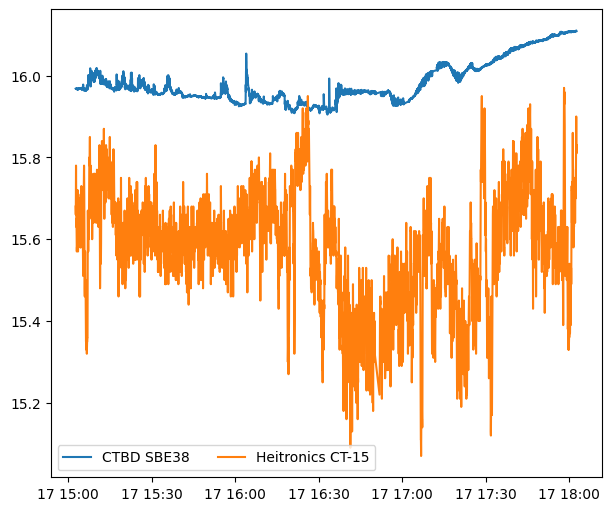

In [7]:
fig, ax = plt.subplots(1,1, figsize = (6,5), constrained_layout = True)

ax.plot(sst.time, sst.sea_water_temperature, label ='CTBD SBE38')
ax.plot(ssst.time, ssst.sea_surface_skin_temperature, label ='Heitronics CT-15')
ax.legend(loc = 'lower left', ncols = 2)